<h1 align="center"  > Exercício 2 - Inteligência Computacional - Algoritmo Árvore de decisão</h1>
<h1 align="center"  > Autor: André Martins</h1>
<h1 align="center" style="color:#8100cc;" >Questão 2b: Calculando o atributo para a raiz de uma árvore de decisão no problema do conjuntos de dados Balance-Scale </h1> <br>
<br><br>
O objetivo deste problema é prever se a balança se inclinará para a esquerda ou para a direita com base nos pesos dos dois lados.
<br>

In [ ]:
# Importando Bibliotecas Necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importando conjunto de dados
col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']
df = pd.read_csv('../input/balancescale/balance-scale.data',names=col,sep=',')


In [ ]:
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


**Lendo o conjunto de dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


**Análise exploratória de dados**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class Name', ylabel='count'>

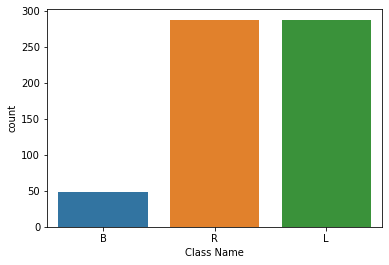

In [ ]:
sns.countplot(df['Class Name'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Left weight', ylabel='count'>

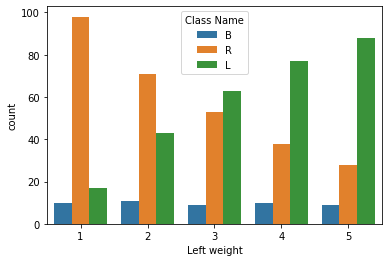

In [ ]:
sns.countplot(df['Left weight'],hue=df['Class Name'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Class Name',axis=1)
y = df[['Class Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)


##Dividindo o conjunto de dados em conjunto de treinamento e teste


**Treinando o Classificador de Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

**Precisão do teste**

In [ ]:
y_predict = clf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.7021276595744681

**Traçando o Gráfico da Árvore de Decisão**

In [ ]:
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

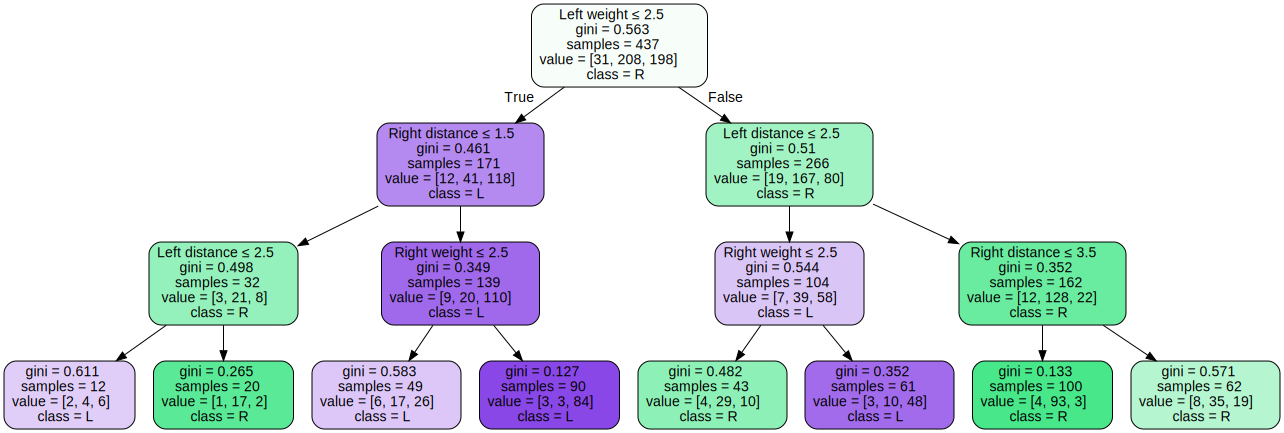

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Left weight <= 2.50
|   |--- Right distance <= 1.50
|   |   |--- Left distance <= 2.50
|   |   |   |--- class: R
|   |   |--- Left distance >  2.50
|   |   |   |--- class: L
|   |--- Right distance >  1.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: R
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|--- Left weight >  2.50
|   |--- Left distance <= 2.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: L
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|   |--- Left distance >  2.50
|   |   |--- Right distance <= 3.50
|   |   |   |--- class: L
|   |   |--- Right distance >  3.50
|   |   |   |--- class: L



In [ ]:
graph.save('graph1.jpg')

'graph1.jpg'